# 과제 1. im2col을 적용해보자.

## Def. im2col 함수 제작

### X를 입력받았을 때, Xc를 반환하는 함수

In [255]:
def return_Xc(X, H, W, k1, k2) :
  result = []
  for n in range ((H - k1 + 1)) :
    for m in range ((W - k2 + 1)) :
      L = [X[n][m], X[n][m+1], X[n+1][m], X[n+1][m+1]]
      result.append(L)
  return result

### W를 입력받았을 때, Wc를 반환하는 함수

In [256]:
def return_Wc(W, k1, k2) :
  result = []
  for i in range(k2):
    for j in range(k1):
      result.append(W[i][j])
  return result

### 행렬곱을 통한 im2col 연산 함수

In [257]:
import numpy as np

def im2col (X, w, H, W, k1, k2) :
  Xc = np.array(return_Xc (X, 4, 4, 2, 2))
  Wc = np.array(return_Wc(w, 2, 2))
  producted_array = Xc @ Wc
  return producted_array

## Test. 일반적인 데이터를 활용한 im2col 연산

### Variable Definition


X : (4, 4) 크기의 2차원 행렬

W : (2, 2) 크기의 2차원 행렬



Y : (3, 3) 크기의 2차원 행렬

(Y는 합성곱 연산의 결괏값이며, Y의 크기는, X의 크기를 (H, W), 필터의 크기를 (k, k)라 라 했을 때, Y의 크기(H', W')는 H' = H - k + 1, W' = W - k + 1이다.)

In [258]:
X = [[1, 2, 5, 2],
     [2, 4, 2, 3],
     [3, 5, 1, 7],
     [4, 2, 3, 2]]
X

[[1, 2, 5, 2], [2, 4, 2, 3], [3, 5, 1, 7], [4, 2, 3, 2]]

In [259]:
W = [[1, 2],
     [3, 4]]
W

[[1, 2], [3, 4]]

### im2col 함수 활용 합성곱 연산

In [260]:
return_Xc(X, 4, 4, 2, 2)

[[1, 2, 2, 4],
 [2, 5, 4, 2],
 [5, 2, 2, 3],
 [2, 4, 3, 5],
 [4, 2, 5, 1],
 [2, 3, 1, 7],
 [3, 5, 4, 2],
 [5, 1, 2, 3],
 [1, 7, 3, 2]]

In [261]:
return_Wc(W, 2, 2)

[1, 2, 3, 4]

In [ ]:
im2col(X, W, 4, 4, 2, 2)

### cf) 일반적인 합성곱 연산과 속도 비교하기

일반적인 합성곱 연산

In [262]:
%%timeit

import numpy as np
m=np.array(X)
f=np.array(W)
result=[]

mx,my=np.shape(m)
fx,fy=np.shape(f)

for i in range(mx-fx+1):
    for j in range(my-fy+1):
        result.append((m[i:i+fy,j:j+fy]*f).sum())

result=np.array(result).reshape(mx-fx+1,my-fy+1)

45.1 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


행렬 활용 합성곱 연산

In [263]:
%%timeit

import numpy as np

def im2col (X, w, H, W, k1, k2) :
  result = []
  Xc = np.array(return_Xc (X, 4, 4, 2, 2))
  Wc = np.array(return_Wc(w, 2, 2))
  producted_array = Xc * Wc
  for x in range (len(producted_array)) :
    result.append(sum(producted_array[x]))
  return np.array(result).reshape(3,3)

im2col(X, W, 4, 4, 2, 2)

37.6 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# 과제 2. 오차역전파를 계산해보자.

## Variable Definition


X : (4, 4) 크기의 2차원 행렬

W : (2, 2) 크기의 2차원 행렬



Y : (3, 3) 크기의 2차원 결괏값


C : (3, 3) 크기의 2차원 행렬

(C는 합성곱 연산의 결괏값이며, C의 크기는, X의 크기를 (H, W), 필터의 크기를 (k, k)라 라 했을 때, Y의 크기(H', W')는 H' = H - k + 1, W' = W - k + 1이다.)

In [226]:
X = [[1, 2, 5, 2],
     [2, 4, 2, 3],
     [3, 5, 1, 7],
     [4, 2, 3, 2]]
X

[[1, 2, 5, 2], [2, 4, 2, 3], [3, 5, 1, 7], [4, 2, 3, 2]]

In [227]:
W = [[1, 1],
     [1, 1]]
W

[[1, 1], [1, 1]]

In [228]:
Y = [13, 12, 15, 14, 12, 11, 19, 18, 15]
Y

[13, 12, 15, 14, 12, 11, 19, 18, 15]

## Def. 손실 계산 함수

In [185]:
def MSE (C, Y) :
  return ((C - Y)**2) / 2

In [186]:
def deltaMSE (C, Y) :
  return C -Y

In [187]:
def detlaW (X) :
  return np.transpose(np.array(X)) ## 전치행렬

In [188]:
import numpy as np

def im2col (X, w, H, W, k1, k2) :
  result = []
  Xc = np.array(return_Xc (X, 4, 4, 2, 2))
  Wc = np.array(return_Wc(w, 2, 2))
  producted_array = Xc * Wc
  for x in range (len(producted_array)) :
    result.append(sum(producted_array[x]))
  return np.array(result)

## 학습

In [229]:
learning_rate = 0.005
epochs = 100

X = np.array(X)
W = np.array(W)
L = []
for epoch in range(epochs) :
  dCdL = deltaMSE(im2col(X, W, 4, 4, 2, 2), Y)
  dWdC = detlaW(return_Xc(X, 4, 4, 2, 2))
  dWdL = dWdC @ dCdL
  W = W -learning_rate*dWdL.reshape(2, 2)
  L.append(sum(MSE(im2col(X, W, 4, 4, 2, 2), Y)))

  if epoch % 10  == 0 :

    print(sum(MSE(im2col(X, W, 4, 4, 2, 2), Y)))

44.93759999999998
29.980154254959658
28.926986222640398
28.373996576025032
28.04842748366097
27.85619212564725
27.742675412075307
27.67564259861264
27.636059014075833
27.612684489159562


## 학습 그래프

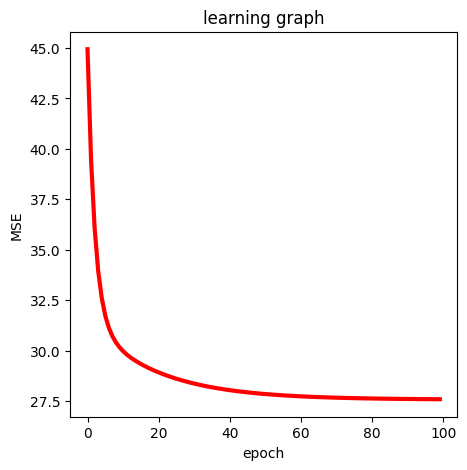

In [237]:
import numpy as np

import matplotlib.pyplot as plt

x = [i for i in range(100)]
plt.figure(figsize=(5,5))
plt.plot(x,L, 'r', linewidth=3.0)
plt.title ("learning graph")
plt.xlabel("epoch")
plt.ylabel("MSE")

plt.show()

# 번외) 극함수 개형 그리는 툴 만들기

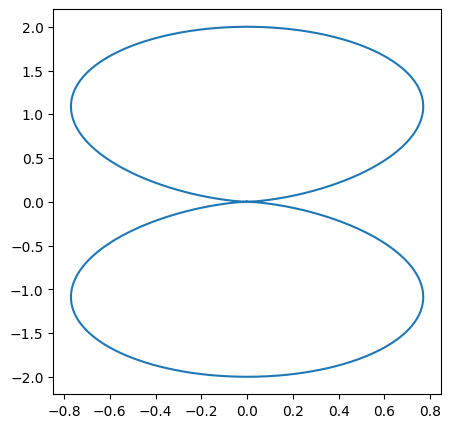

In [ ]:
import numpy as np

import matplotlib.pyplot as plt



X = np.linspace(0,2*np.pi,10000)

Y = 1-np.cos (2*X)


x = Y * np.cos(X)
y = Y * np.sin(X)
plt.figure(figsize=(5,5))
plt.plot(x,y)